# MAP inference

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Bayes_icon.svg" width="300px" height="300px" />

> In the fifth homework you will perform an application of the MAP inference we saw in class. For instance, you will design a Bayesian net-based based classifier, train and test it, and compare it according a benchmark.

> If further questions arise, please use the slack channel, or write me to esjimenezro@iteso.mx.

> **References:**
> - [Solving A Simple Classification Problem with Python — Fruits Lovers’ Edition](https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2)


<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/e/ed/Bayes_icon.svg.</p>

___

## Data

The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. And then the professors at University of Michigan formatted the fruits data slightly and it can be downloaded from [here](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt).

## 1. EDA

Perform some exploratory data analysis over the fruits dataset to get familiarized with the data.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#%% Dataset exploration
df = pd.read_table('fruit_data_with_colors.txt')
df.shape

(59, 7)

In [21]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
print(df.describe())

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000


In [24]:
corr = df.corr()
corr

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


<AxesSubplot:>

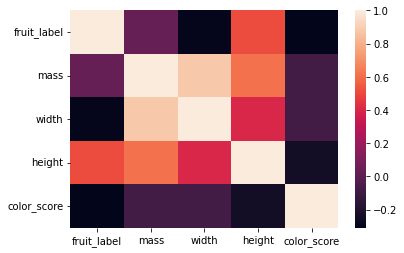

In [25]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

C:\Users\adria\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


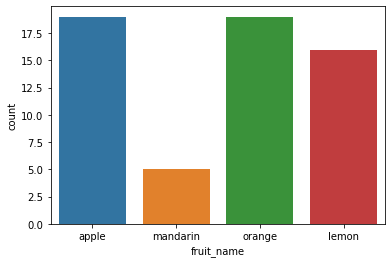

In [30]:
sns.countplot(df['fruit_name'],label="Count")
plt.show()

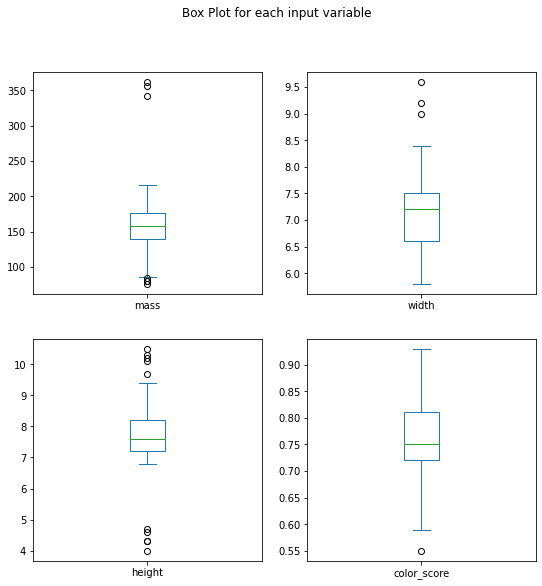

In [33]:
df.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.show()

array([[<AxesSubplot:title={'center':'mass'}>,
        <AxesSubplot:title={'center':'width'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'color_score'}>]], dtype=object)

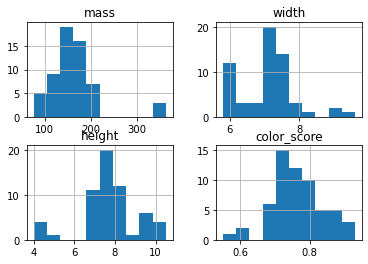

In [48]:
df.drop('fruit_label' ,axis=1).hist()

## 2. Design a logistic regression classifier

2.1. Split the dataset into train and test. Be sure to suffle the data because it comes ordered.

2.2. Train a logistic regression classifier, using as explainer variables the **mass**, the **width**, the **height**, and the **color_score** for the target variable **fruit_label**

2.3. Obtain the accuracy of your classifier over the test dataset.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [51]:
#%% Training set and Test set creation
X = df[['mass', 'width', 'height', 'color_score']]
y = df['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [56]:
#%% Logistic Regression model

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log_reg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log_reg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.47


C:\Users\adria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 3. Design naïve Bayes classifier

3.1. Use the same train and test sets from the above point.

3.2. Design and train a naïve Bayes classifier, using as explainer variables the **mass**, the **width**, the **height**, and the **color_score** for the target variable **fruit_label**

3.3. Obtain the accuracy of your classifier over the test dataset.

In [59]:
from sklearn.naive_bayes import GaussianNB

#%% NAIVE BAYES MODEL
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb_model.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb_model.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


## Which classifier performs better on the test set?

Gaussian Naive Bayes performs better on both, training and test sets.
Also Logistic Regression classifier seems to have convergence problems.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>